In [1]:
from utils import *
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Segoe UI Symbol','simHei','Arial','sans-serif']

## Load Data

In [2]:
years = [2013,2014,2015,2016,2017]
n_years=len(years)
resampling_period = '1M'

original_data = load_resample_data(years, resampling_period)
windfarms_names = original_data.columns.tolist() 
original_data.head(5)

year:2013	(105120, 20)
year:2014	(105120, 20)
year:2015	(105120, 20)
year:2016	(105408, 20)
year:2017	(105120, 20)
resampled to  (60, 20)


,AKE1,ARD1,BSR1,BTR1,BUL1,BUL2,CR1,CRE3,CRR1,GWW1,HAL1,IEW1,IEW2,KHW1,NEP1,OWF1,SCR2,SCR3,SCR4,TAB1
DT,,,,,,,,,,,,,,,,,,,,
2013-01-31,41.39,32.84,nan,30.64,nan,nan,19.65,13.84,41.62,41.29,65.79,29.14,29.00,34.88,27.29,nan,10.58,15.25,42.48,36.17
2013-02-28,41.71,36.06,nan,33.47,nan,nan,19.88,12.73,40.12,38.50,68.65,30.35,31.22,37.19,25.14,nan,11.66,15.87,35.26,35.70
2013-03-31,17.65,17.40,nan,15.14,nan,nan,11.12,6.82,22.18,20.26,54.19,16.32,13.49,18.74,20.58,nan,5.84,9.68,26.26,24.52
2013-04-30,23.65,23.04,nan,20.89,nan,nan,12.14,5.66,20.34,26.23,60.91,20.38,17.85,22.78,28.53,nan,8.43,11.81,36.07,26.30
2013-05-31,18.48,20.34,nan,16.40,nan,nan,9.74,5.61,19.30,22.06,56.21,13.52,11.19,18.91,24.95,nan,6.42,10.00,32.19,24.03


### Normalize data = Capacity Factor

In [11]:
windfarms = pd.read_excel('NRGstreamData/WindFarms.xlsx').sort_values(by='Asset ID').reset_index(drop = True)
normalized_data = original_data / windfarms['Capacity'].values

# sum_capacities_each_row = np.array(~original_data.isnull().values * windfarms['Capacity'].values).sum(axis=1)
# normalized_data['Total'] = original_data.sum(axis=1)/ sum_capacities_each_row

normalized_data.head(3)

,AKE1,ARD1,BSR1,BTR1,BUL1,BUL2,CR1,CRE3,CRR1,GWW1,HAL1,IEW1,IEW2,KHW1,NEP1,OWF1,SCR2,SCR3,SCR4,TAB1
DT,,,,,,,,,,,,,,,,,,,,
2013-01-31,0.57,0.48,nan,0.46,nan,nan,0.50,0.46,0.54,0.58,0.44,0.43,0.44,0.55,0.33,nan,0.34,0.49,0.48,0.44
2013-02-28,0.57,0.53,nan,0.51,nan,nan,0.51,0.42,0.52,0.54,0.46,0.45,0.47,0.59,0.31,nan,0.38,0.51,0.40,0.44
2013-03-31,0.24,0.26,nan,0.23,nan,nan,0.29,0.23,0.29,0.29,0.36,0.24,0.20,0.30,0.25,nan,0.19,0.31,0.30,0.30


In [12]:
# I had used CF term for variable names, but in other files, I have used normalized_data. So, I renamed it.
cf = normalized_data

## Plot the capacity factor (CF) of all windfarm in each month for the last years

In [13]:
avg_cf = cf.mean(axis = 1).values
avg_cf = np.transpose(avg_cf.reshape(-1,12))
avg_cf = pd.DataFrame(avg_cf)
avg_cf.index = [datetime.date(2008, w, 1).strftime('%B') for w in range(1,13)]
avg_cf.columns = years
avg_avg_cf = avg_cf.mean(axis = 1)
avg_cf['Average'] = (avg_avg_cf)
avg_cf.head()

,2013,2014,2015,2016,2017,Average
January,0.47,0.46,0.48,0.39,0.40,0.44
February,0.48,0.27,0.30,0.51,0.31,0.37
March,0.27,0.26,0.46,0.41,0.37,0.35
April,0.32,0.34,0.35,0.31,0.34,0.33
May,0.27,0.18,0.17,0.24,0.31,0.23


### weighted average capacity factor

In [31]:
sum_capacities_each_row = np.array(~original_data.isnull().values * windfarms['Capacity'].values).sum(axis=1)

weighted_avg_cf = original_data.sum(axis=1)/ sum_capacities_each_row
weighted_avg_cf = weighted_avg_cf.values.reshape(-1,12).transpose()
weighted_avg_cf = pd.DataFrame(weighted_avg_cf)

weighted_avg_cf.index = [datetime.date(2008, w, 1).strftime('%B') for w in range(1,13)]
weighted_avg_cf.columns = years

weighted_avg_cf['Average'] = weighted_avg_cf.mean(axis = 1)
weighted_avg_cf.head()

,2013,2014,2015,2016,2017,Average
January,0.47,0.47,0.47,0.38,0.40,0.44
February,0.47,0.23,0.31,0.49,0.31,0.36
March,0.28,0.22,0.45,0.41,0.39,0.35
April,0.34,0.29,0.37,0.32,0.34,0.33
May,0.29,0.20,0.21,0.27,0.32,0.26


In [39]:
weighted_avg_cf

,2013,2014,2015,2016,2017,Average
January,0.47,0.47,0.47,0.38,0.40,0.44
February,0.47,0.23,0.31,0.49,0.31,0.36
March,0.28,0.22,0.45,0.41,0.39,0.35
April,0.34,0.29,0.37,0.32,0.34,0.33
May,0.29,0.20,0.21,0.27,0.32,0.26
June,0.24,0.23,0.16,0.35,0.35,0.27
July,0.15,0.21,0.22,0.20,0.23,0.20
August,0.16,0.16,0.23,0.21,0.21,0.19
September,0.29,0.27,0.32,0.34,0.28,0.30
October,0.34,0.44,0.37,0.28,0.50,0.39


In [51]:
np.sum([44,36,41])/392

0.3086734693877551

In [49]:
np.sum(weighted_avg_cf['Average'])

3.920837883184416

In [32]:
avg_cf_last_5years = weighted_avg_cf['Average'].mean()
avg_cf_last_5years

0.326736490265368

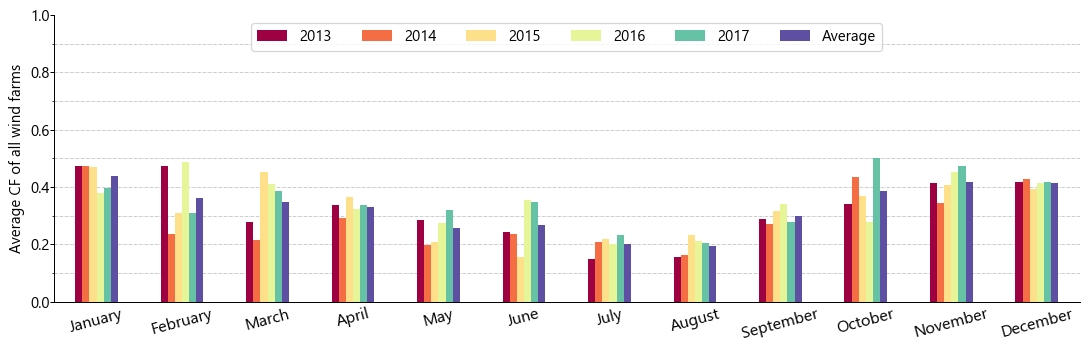

In [34]:
data_here = weighted_avg_cf
fig,ax = plt.subplots(figsize=(12,4),dpi=90, facecolor='w', edgecolor='k')

pax = data_here.plot(kind='bar', ax = ax, legend=True, colormap='Spectral') #Spectral RdYlGn
ax.legend(data_here.columns,loc='upper center', fontsize = 12, ncol=len(data_here.columns))
ax.tick_params(axis='x', labelsize = 13, which='major', pad=0, rotation=15 , color = 'w')
ax.tick_params(axis='y', labelsize = 12, which='major', pad=0, rotation=0 , color = 'k')
ax.set_ylim(bottom=0,top=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticks(np.arange(0,1,0.1),minor=True)

ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_axisbelow(True)
ax.grid(color='k', linestyle='-.', linewidth=0.4, alpha = 0.4, which = 'minor')

fig.tight_layout()

x = np.arange(-10, 100, 0.1)
y2 = [avg_cf_last_5years] * len(x) 
# ax.plot(x,y2, '--', color='black',lw=1)

ax.set_ylabel('Average CF of all wind farms',fontsize=12)
fig.savefig('Average_CF_all_windfarms_in_each_month.jpg', papertype='letter', dpi = 300, bbox_inches='tight')    

In [35]:
colors = [pax.get_children()[i].get_fc() for i in range(0,data_here.shape[0] * data_here.shape[1],data_here.shape[0])]
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157, 1.0),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862, 1.0),
 (0.9019607843137256, 0.9607843137254902, 0.5960784313725491, 1.0),
 (0.4, 0.7607843137254902, 0.6470588235294118, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [36]:
my_cmap = matplotlib.cm.get_cmap('RdYlGn')
# from matplotlib.colors import Normalize
# get normalize function (takes data in range [vmin, vmax] -> [0, 1])
# my_norm = Normalize(vmin=0, vmax=4)
# my_cmap(my_norm([0,1,2,3]))

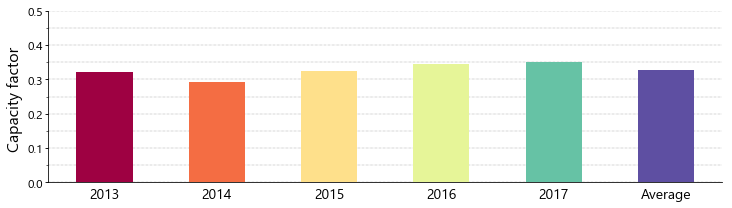

In [37]:
data_here = weighted_avg_cf.mean(axis = 0)

# Recently added
my_cmap = matplotlib.cm.get_cmap('RdYlGn')
colors=my_cmap([0,0.33,0.66,1])

# cmap = matplotlib.cm.get_cmap('tab20c')
# colors = [cmap(t) for t in windfarms['Capacity']/100]
# colors = ['darkorange','gold', 'firebrick', 'darkblue', 'darkgreen', 'chocolate']
colors = [pax.get_children()[i].get_fc() for i in range(0,12*(n_years+1),12)]

fig,ax = plt.subplots(figsize=(14,1),dpi=72, facecolor='w', edgecolor='k')

ax = data_here.plot(kind='bar', ax = ax, figsize=(10,3),color=colors, position = 0.5)
# ax.legend(years,loc='best', fontsize = 13, ncol=len(years))
ax.tick_params(axis='x', labelsize = 14, which='major', pad=2, rotation=0 , color = 'w')
ax.tick_params(axis='y', labelsize = 12, which='major', pad=2, rotation=0 , color = 'k')
# for i in range(n_years+1):
#     ax.get_children()[i].set_width(0.4)

ax.set_yticks(np.arange(0,.55,0.05),minor=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_axisbelow(True)
ax.grid(color='k', linestyle='-.', linewidth=0.4, alpha = 0.4, which = 'minor')

fig.tight_layout()

ax.set_ylabel('Capacity factor ',fontsize=16)
fig.savefig('Average_CF_all_Windfarms_in_the_last_years.jpg', papertype='letter', dpi = 300, bbox_inches='tight')    

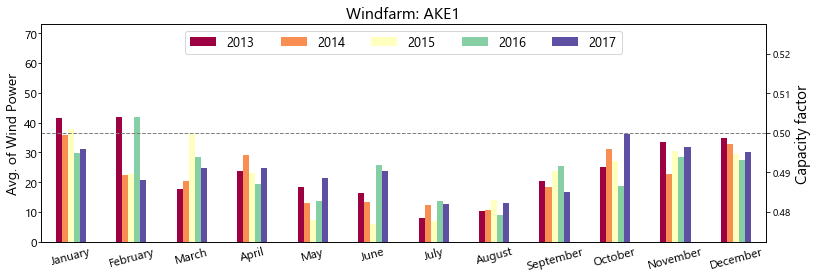

In [54]:
for w in ([windfarms_names[0]]):
    v = original_data.loc[:,w].values.reshape(len(years),-1)
    dv = {years[c]:v[c] for c in range(len(years))}
    dv_df = pd.DataFrame.from_dict(dv)

    dv_df.index = [datetime.date(2008, w, 1).strftime('%B') for w in range(1,13)]
    dv_df

    ax = dv_df.plot(kind='bar', legend=True, figsize=(13,4), colormap='Spectral') #
    ax.legend(years,loc='upper center', fontsize = 13, ncol=len(years))
    ax.tick_params(axis='x', labelsize = 12, which='major', pad=0, rotation=15 , color = 'w')
    ax.tick_params(axis='y', labelsize = 12, which='major', pad=0, rotation=0 , color = 'k')
    ax.set_ylim(bottom =0 , top = windfarms['Capacity'][0])
    ax.set_title('Windfarm: {}'.format(w), fontsize=16)
        
    ax.set_ylabel('Avg. of Wind Power',fontsize=14)

    x = np.arange(-10, 100, 0.1)
    y1 = 0.05 * x**2
    y2 = [0.5] * len(x) 

    
    ax2 = ax.twinx()
    ax2.plot(x,y2, '--', color='grey',lw=1)
#     ax.annotate('ff',1,1)
    ax2.set_ylabel('Capacity factor', color='k', fontsize=15)

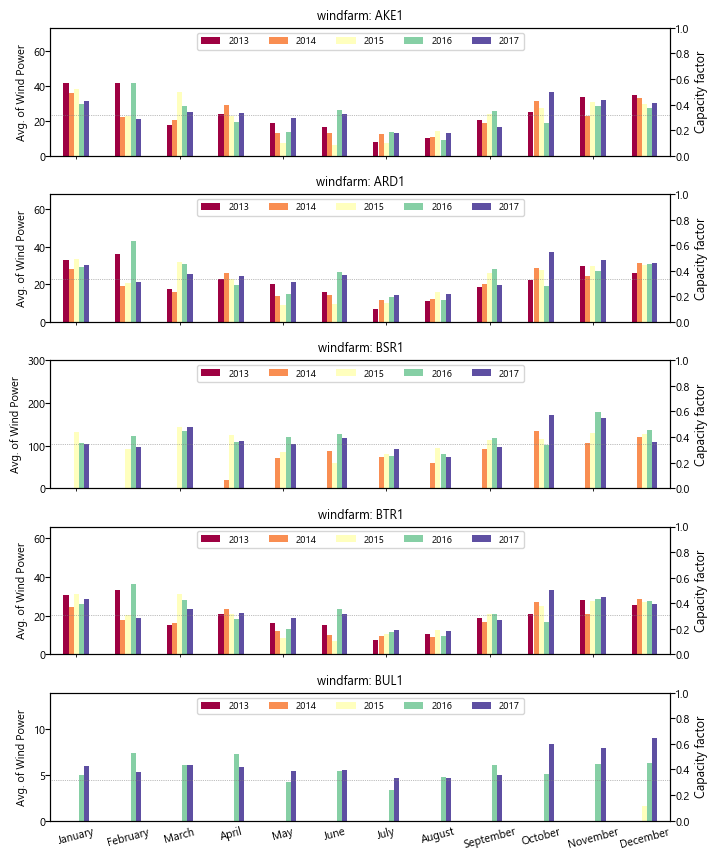

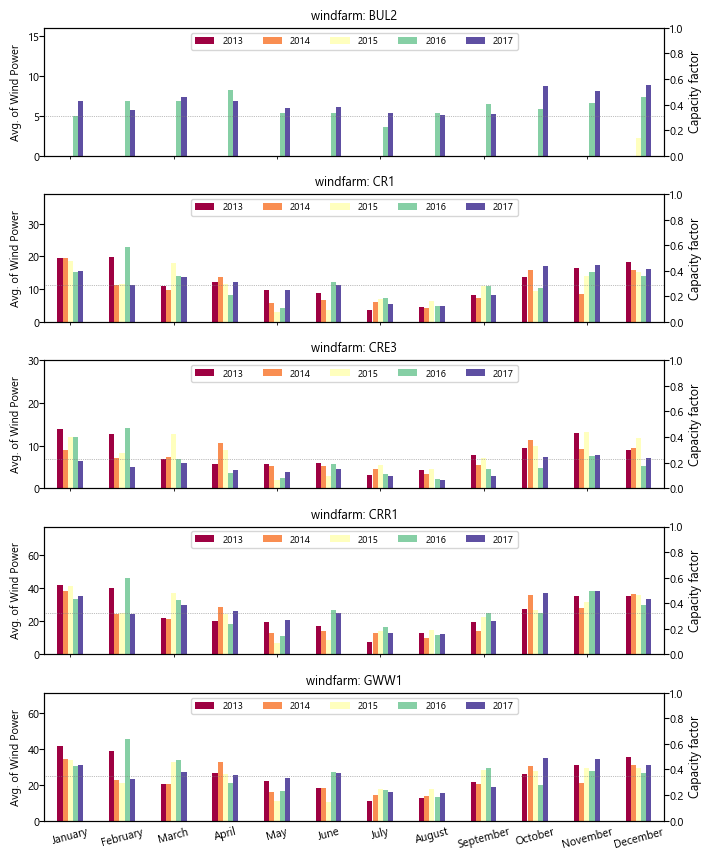

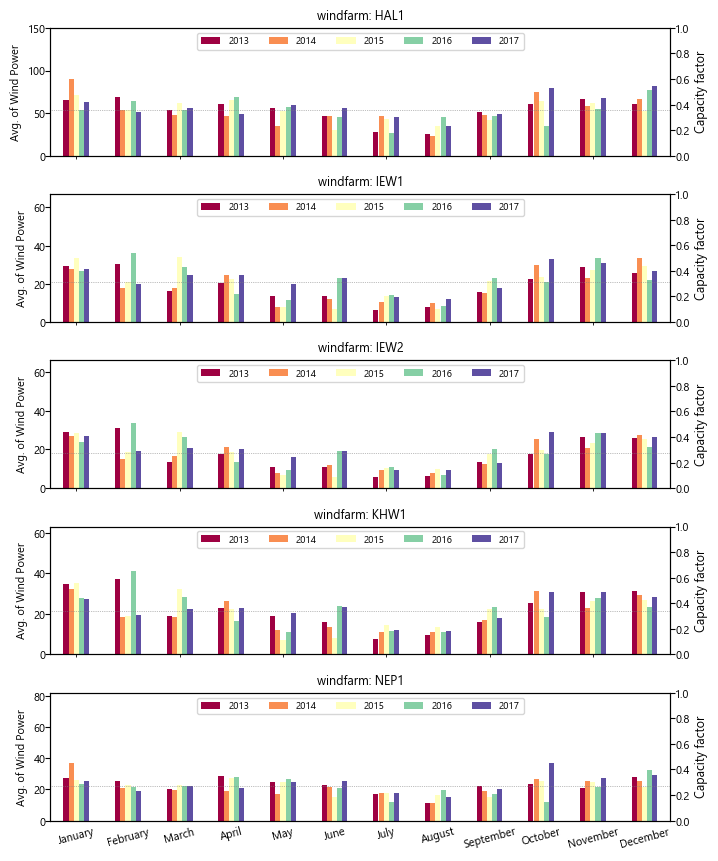

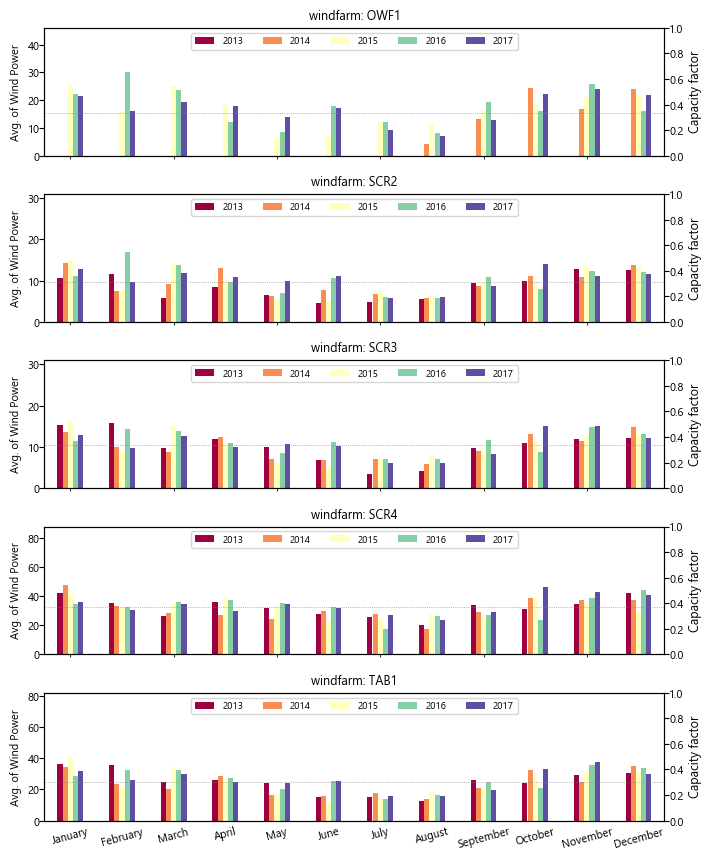

In [55]:
data_here = original_data 
total_plots = 20
n_rows = 5 ; figsize_r = 10.5
n_cols = 1 ; figsize_c = 8
n_plots = n_rows * n_cols
Title = ' Average_monthly_wind_power_of_each_windfarm_during_last_years'
savefig = 1

for p in range(int(-(-total_plots//n_plots))):
    fig, axar = plt.subplots(n_rows, n_cols,figsize=(figsize_c,figsize_r), dpi=100)
    fig.subplots_adjust(hspace=0.3, wspace=0.05)        

    ind = 0
    for i in range(n_plots*p,min(n_plots*(p+1),total_plots)):
        
        v = data_here.iloc[:,i].values.reshape(len(years),-1)
        dv = {years[c]:v[c] for c in range(len(years))}
        dv_df = pd.DataFrame.from_dict(dv)
        dv_df.index = [datetime.date(2008, i, 1).strftime('%B') for i in range(1,13)]
        
        if n_cols ==1:
            ax = axar[ind]
        elif n_cols > 1:
            r = ind // n_cols
            c = ind % n_cols
            ax = axar[r, c]    

        ax = dv_df.plot(kind='bar', ax = ax, colormap='Spectral')
        ax.legend(years,loc='upper center', fontsize = 7, ncol=len(years))
        ax.tick_params(axis='x', labelsize = 8, which='major', pad=0, rotation=15 , color = 'w')
        ax.tick_params(axis='y', labelsize = 8, which='major', pad=0, rotation=0 , color = 'k')
        ax.set_title('windfarm: {}'.format(windfarms_names[i]), fontsize=9, weight='bold')
        ax.set_ylim(bottom =0 , top = windfarms['Capacity'][i])
        ax.set_ylabel('Avg. of Wind Power',fontsize=8)

        ax2 = ax.twinx()
        x = np.arange(-10, 100, 0.1)
        y2 = [dv_df.mean().mean()/windfarms['Capacity'][i]] * len(x) 
        ax2.plot(x,y2, ':', color='grey',lw=0.5)
        ax2.set_ylabel('Capacity factor', color='k', fontsize=9)
        ax2.tick_params(axis='y', labelsize = 8, which='major', pad=0, rotation=0 , color = 'k')
        ax2.set_ylim(bottom=0, top=1)

        if savefig:
            fig.savefig(Title+str(p)+'.jpg', papertype='letter', dpi = 300, bbox_inches='tight')    

        ind = ind + 1
        #plt.close()

## Same plot, but by more elegant way (groupby) which is much more generalizable

In [70]:
data_here = original_data.copy()
data_here.insert(loc=0, column='year', value=[ts.year for ts in data_here.index])
data_here.insert(loc=1, column='month', value=[ts.month for ts in data_here.index])
data_here.head()

,year,month,AKE1,ARD1,BSR1,BTR1,BUL1,BUL2,CR1,CRE3,...,HAL1,IEW1,IEW2,KHW1,NEP1,OWF1,SCR2,SCR3,SCR4,TAB1
DT,,,,,,,,,,,,,,,,,,,,,
2013-01-31,2013,1,41.39,32.84,nan,30.64,nan,nan,19.65,13.84,...,65.79,29.14,29.00,34.88,27.29,nan,10.58,15.25,42.48,36.17
2013-02-28,2013,2,41.71,36.06,nan,33.47,nan,nan,19.88,12.73,...,68.65,30.35,31.22,37.19,25.14,nan,11.66,15.87,35.26,35.70
2013-03-31,2013,3,17.65,17.40,nan,15.14,nan,nan,11.12,6.82,...,54.19,16.32,13.49,18.74,20.58,nan,5.84,9.68,26.26,24.52
2013-04-30,2013,4,23.65,23.04,nan,20.89,nan,nan,12.14,5.66,...,60.91,20.38,17.85,22.78,28.53,nan,8.43,11.81,36.07,26.30
2013-05-31,2013,5,18.48,20.34,nan,16.40,nan,nan,9.74,5.61,...,56.21,13.52,11.19,18.91,24.95,nan,6.42,10.00,32.19,24.03


In [71]:
data_here = data_here.groupby(['month','year']).mean()
data_here.head()

AKE1  ARD1   BSR1  BTR1  BUL1  BUL2   CR1  CRE3  CRR1  GWW1  HAL1  \
month year                                                                      
1     2013 41.39 32.84    nan 30.64   nan   nan 19.65 13.84 41.62 41.29 65.79   
      2014 35.72 28.42    nan 24.57   nan   nan 19.50  8.92 38.06 34.23 89.80   
      2015 37.90 33.68 131.89 31.29   nan   nan 18.59 12.10 40.98 33.47 71.46   
      2016 29.61 29.05 105.18 26.09  5.01  5.01 15.28 11.98 33.26 30.09 53.74   
      2017 31.25 30.31 104.04 28.42  6.01  6.84 15.55  6.34 35.04 31.00 63.09   

            IEW1  IEW2  KHW1  NEP1  OWF1  SCR2  SCR3  SCR4  TAB1  
month year                                                        
1     2013 29.14 29.00 34.88 27.29   nan 10.58 15.25 42.48 36.17  
      2014 27.80 26.82 32.09 37.09   nan 14.41 13.73 48.06 34.67  
      2015 33.31 28.42 35.23 25.89 25.42 14.92 16.15 41.56 40.48  
      2016 26.45 23.95 27.83 23.18 22.19 11.22 11.54 34.90 28.87  
      2017 27.79 26.83 27.43 25.61 21.56 12.80 12.84 35.99 31.85

In [65]:
# data_here = original_data.copy()
# data_here.insert(loc=0, column='year', value=[ts.year for ts in data_here.index])
# data_here.insert(loc=1, column='month', value=[ts.month for ts in data_here.index])
# data_here = data_here.groupby(['month','year']).mean()

total_plots = 4
n_rows = 4 ; figsize_r = 10.5
n_cols = 1 ; figsize_c = 8
n_plots = n_rows * n_cols
Title = ' Average monthly wind power of each windfarms during last years'
savefig = 0

for p in range(int(-(-total_plots//n_plots))):
    fig, axar = plt.subplots(n_rows, n_cols,figsize=(figsize_c,figsize_r), dpi=100)
    fig.subplots_adjust(hspace=0.35, wspace=0.2)        

    ind = 0
    for i in range(n_plots*p,min(n_plots*(p+1),total_plots)):
        
        dv_df = data_here[windfarms_names[ind]].unstack()
        dv_df.index = [datetime.date(2008, i, 1).strftime('%B') for i in range(1,13)]
        
        #print(dv_df)
        if n_cols ==1:
            ax = axar[ind]
        elif n_cols > 1:
            r = ind // n_cols
            c = ind % n_cols
            ax = axar[r, c]    

        ax = dv_df.plot(kind='bar', ax = ax, colormap='Spectral')
        ax.legend(years,loc='upper center', fontsize = 7, ncol=len(years))
        ax.tick_params(axis='x', labelsize = 8, which='major', pad=0, rotation=15 , color = 'w')
        ax.tick_params(axis='y', labelsize = 8, which='major', pad=0, rotation=0 , color = 'k')
        ax.set_title('windfarm: {}'.format(windfarms_names[i]), fontsize=9, weight='bold')
        ax.set_ylim(bottom =0 , top = windfarms['Capacity'][i])
        ax.set_ylabel('Avg. of Wind Power',fontsize=8)
        ax.set_xticklabels(dv_df.index)

        
#         ax2 = axar[ind].twinx()
#         ax = dv_df.plot(kind='bar', ax = ax2 , colormap='jet')

# #         ax2.set_ylabel('Capacity factor', color='k', fontsize=9)
#         ax2.tick_params(axis='y', labelsize = 7, which='major', pad=0, rotation=0 , color = 'k')
#         ax2.tick_params(axis='x', labelsize = 19, which='major', pad=0, rotation=15 , color = 'k')
#         ax2.set_xticklabels(dv_df.index)

        
        if savefig:
            fig.savefig(Title+str(p)+'.jpg', papertype='letter', dpi = 300, bbox_inches='tight')    

        ind = ind + 1
        
        #plt.close()

In [67]:
data_here

AKE1  ARD1   BSR1  BTR1  BUL1  BUL2   CR1  CRE3  CRR1  GWW1  HAL1  \
month year                                                                      
1     2013 41.39 32.84    nan 30.64   nan   nan 19.65 13.84 41.62 41.29 65.79   
      2014 35.72 28.42    nan 24.57   nan   nan 19.50  8.92 38.06 34.23 89.80   
      2015 37.90 33.68 131.89 31.29   nan   nan 18.59 12.10 40.98 33.47 71.46   
      2016 29.61 29.05 105.18 26.09  5.01  5.01 15.28 11.98 33.26 30.09 53.74   
      2017 31.25 30.31 104.04 28.42  6.01  6.84 15.55  6.34 35.04 31.00 63.09   
2     2013 41.71 36.06    nan 33.47   nan   nan 19.88 12.73 40.12 38.50 68.65   
      2014 22.35 18.95   0.00 17.59   nan   nan 11.26  6.97 24.27 22.32 53.97   
      2015 22.69 20.96  92.69 20.19   nan   nan 11.58  8.36 24.91 20.67 53.37   
      2016 41.79 43.22 122.83 36.24  7.36  6.89 22.73 14.09 45.98 45.49 64.67   
      2017 20.83 21.40  97.05 19.05  5.34  5.74 11.25  4.86 24.37 23.21 50.94   
3     2013 17.65 17.40    nan 15.14   nan   nan 11.12  6.82 22.18 20.26 54.19   
      2014 20.44 16.14   0.00 16.23   nan   nan  9.84  7.41 21.34 20.55 47.59   
      2015 36.26 31.70 144.74 31.33   nan   nan 17.97 12.76 37.15 32.80 61.57   
      2016 28.47 30.58 133.15 28.31  6.10  6.91 14.06  6.88 32.83 33.61 53.61   
      2017 24.71 25.31 144.13 23.67  6.11  7.29 13.74  5.81 29.68 26.78 56.54   
4     2013 23.65 23.04    nan 20.89   nan   nan 12.14  5.66 20.34 26.23 60.91   
      2014 29.04 25.79  19.12 23.26   nan   nan 13.71 10.63 28.47 32.63 46.95   
      2015 22.90 23.03 124.35 20.61   nan   nan 11.48  8.98 24.34 26.14 65.07   
      2016 19.40 19.49 109.33 18.30  7.25  8.25  8.27  3.46 18.33 20.85 69.38   
      2017 24.66 24.51 111.31 21.21  5.91  6.80 12.11  4.37 26.09 25.58 49.09   
5     2013 18.48 20.34    nan 16.40   nan   nan  9.74  5.61 19.30 22.06 56.21   
      2014 12.82 13.70  70.67 12.10   nan   nan  5.65  5.15 13.07 15.80 35.07   
      2015  7.28  9.25  85.51  8.32   nan   nan  2.91  2.01  6.99 10.73 52.85   
      2016 13.76 14.68 120.17 13.26  4.27  5.39  4.40  2.42 10.99 16.21 57.16   
      2017 21.49 21.03 103.74 18.77  5.43  6.00  9.85  3.78 20.89 23.75 59.52   
6     2013 16.37 16.16    nan 15.15   nan   nan  8.92  5.94 17.36 18.00 46.94   
      2014 13.25 14.54  88.20 10.05   nan   nan  6.63  5.21 14.13 18.13 46.67   
      2015  6.04  9.36  59.97  6.88   nan   nan  3.69  2.93  8.77 10.42 29.86   
      2016 25.85 26.31 128.13 23.50  5.40  5.36 12.14  5.66 26.90 27.14 45.60   
      2017 23.63 25.08 116.62 20.92  5.50  6.04 11.38  4.45 24.91 26.69 56.27   
7     2013  7.90  7.16    nan  7.23   nan   nan  3.57  3.09  7.76 10.89 27.76   
      2014 12.22 11.53  73.99  9.65   nan   nan  6.18  4.49 13.10 14.24 46.92   
      2015  7.02  9.99  80.06 10.48   nan   nan  6.86  5.35 13.97 17.76 42.81   
      2016 13.57 13.52  75.38 11.49  3.32  3.54  7.25  3.43 16.78 16.88 26.25   
      2017 12.74 14.12  92.12 12.44  4.69  5.29  5.52  2.91 13.16 15.65 45.71   
8     2013 10.27 11.24    nan 10.34   nan   nan  4.60  4.32 12.70 12.73 26.01   
      2014 10.47 12.41  59.92  8.84   nan   nan  4.30  3.39  9.91 13.49 22.83   
      2015 13.89 15.82  94.64 12.47   nan   nan  6.29  4.46 14.82 17.34 35.31   
      2016  9.10 11.50  81.20  9.42  4.83  5.32  4.76  2.21 11.44 13.18 45.03   
      2017 13.04 14.90  73.07 12.18  4.64  5.09  5.00  1.90 12.38 15.38 35.16   
9     2013 20.50 18.51    nan 18.69   nan   nan  8.33  7.76 19.25 21.19 51.00   
      2014 18.42 20.30  92.43 16.54   nan   nan  7.36  5.36 13.98 20.34 48.16   
      2015 23.66 26.07 113.40 20.69   nan   nan 10.90  7.06 22.80 28.06 42.26   
      2016 25.37 28.16 117.31 21.07  6.08  6.46 10.98  4.60 24.65 29.37 46.69   
      2017 16.59 19.77  97.63 17.63  5.01  5.28  8.13  2.86 20.02 18.40 48.85   
10    2013 24.97 22.20    nan 20.74   nan   nan 13.66  9.52 27.37 26.16 60.69   
      2014 31.12 28.77 134.72 26.93   nan   nan 15.70 11.20 35.88 30.45 75.21   
      2015 27.09 27.65 115.80 25.05   nan  

In [ ]:
n_subplots=2
fig, axar = plt.subplots(n_subplots,1)
# fig.subplots_adjust(hspace=0.35, wspace=0.2)        

df1 = pd.Series(np.random.rand(10))
df2 = pd.Series(np.random.rand(10))

for i in range(n_subplots):
#     del ax1
#     del ax2
#     ax2=[]
    ax1 = axar[i]


    df1.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_xticklabels((df1.index)*10)
    
    ax2 = ax1.twinx()
    ax2.set_xticklabels((df1.index)*10)
    ax2.set_ylim(bottom=0, top=10)
    del ax2
    del ax1
    # df2.plot(kind='line', secondary_y=True, ax=ax2)

In [ ]:
n_subplots=2
fig, axar = plt.subplots(n_subplots, 1)

df1 = pd.Series(np.random.rand(10))
df2 = pd.Series(np.random.rand(10))

ax1 = axar[0]
df1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xticklabels((df1.index)*10)

ax2 = ax.twinx()
# ax2.set_xticklabels((df1.index)*10)
ax2.set_ylim(bottom=0, top=10)
# df2.plot(kind='line', secondary_y=True, ax=ax2)

ax3 = axar[1]
df1.plot(kind='bar', stacked=True, ax=ax3)
ax3.set_xticklabels((df1.index)*10)

ax4 = ax.twinx()
# ax4.set_xticklabels((df1.index)*10)
ax4.set_ylim(bottom=0, top=10)
# df2.plot(kind='line', secondary_y=True, ax=ax2)